In [10]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [11]:
data = pd.read_excel("remaining_features.xlsx")
X = data.iloc[:, 0:9].values
y = data.iloc[:, 9].values



In [12]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Applying PCA function on training and testing set of X component
pca = PCA()  

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_



C:\Users\rivka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8542694004671685
Classification Report:
               precision    recall  f1-score   support

      benign       0.86      0.90      0.88      4584
     malware       0.85      0.78      0.81      3122

    accuracy                           0.85      7706
   macro avg       0.85      0.84      0.85      7706
weighted avg       0.85      0.85      0.85      7706



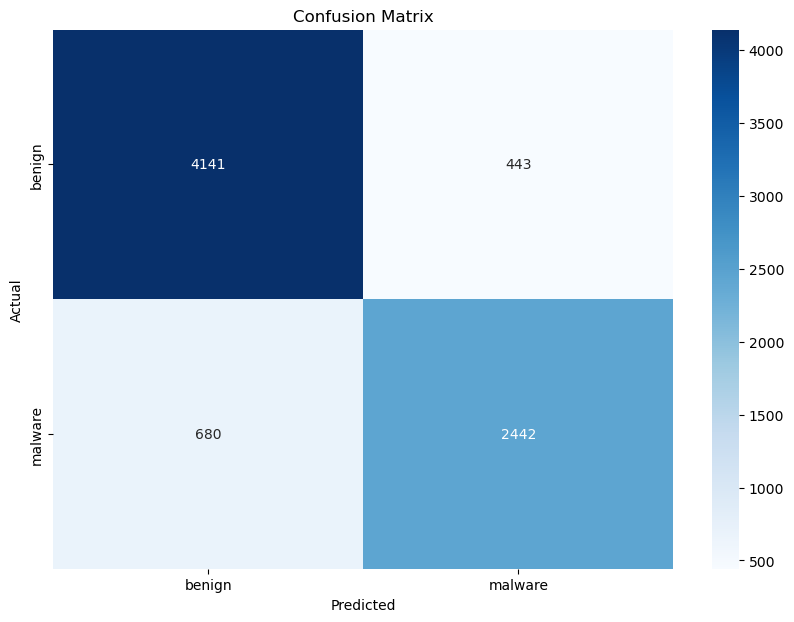

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fitting Logistic Regression to the training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_pca, y_train)

# Predicting the test set result using predict function under LogisticRegression 
y_pred = classifier.predict(X_test_pca)

# Calculating accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

# Plotting the confusion matrix
cf = pd.crosstab(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cf, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


Random Forest Accuracy: 0.9839086426161433
Random Forest Classification Report:
               precision    recall  f1-score   support

      benign       0.98      0.99      0.99      4584
     malware       0.98      0.98      0.98      3122

    accuracy                           0.98      7706
   macro avg       0.98      0.98      0.98      7706
weighted avg       0.98      0.98      0.98      7706



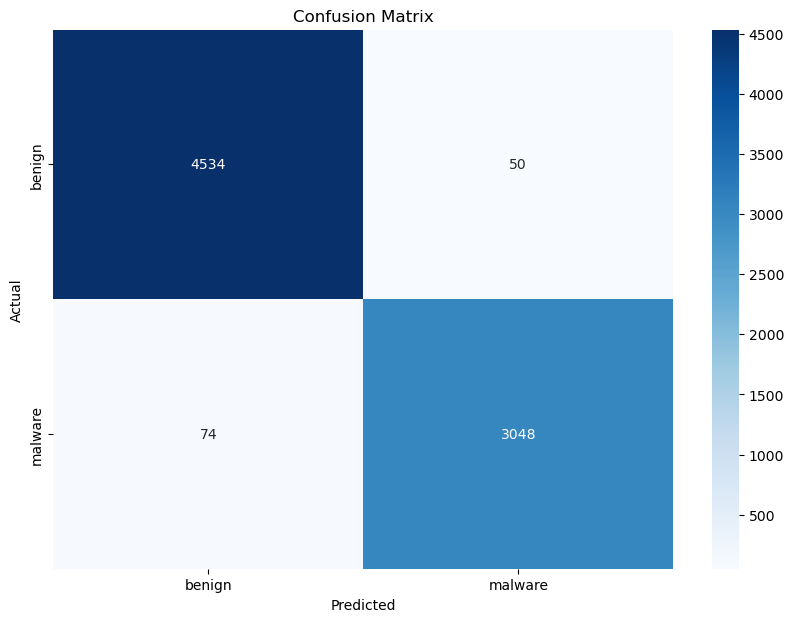

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# יצירת המודל
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# אימון המודל
rf_model.fit(X_train_pca, y_train)

# Predicting the test set result using predict function under LogisticRegression 
# חיזוי והערכה
y_pred = rf_model.predict(X_test_pca)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))
# Plotting the confusion matrix
cf = pd.crosstab(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cf, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


AdaBoost Accuracy: 0.9259018946275629
AdaBoost Classification Report:
               precision    recall  f1-score   support

      benign       0.94      0.94      0.94      4584
     malware       0.91      0.91      0.91      3122

    accuracy                           0.93      7706
   macro avg       0.92      0.92      0.92      7706
weighted avg       0.93      0.93      0.93      7706



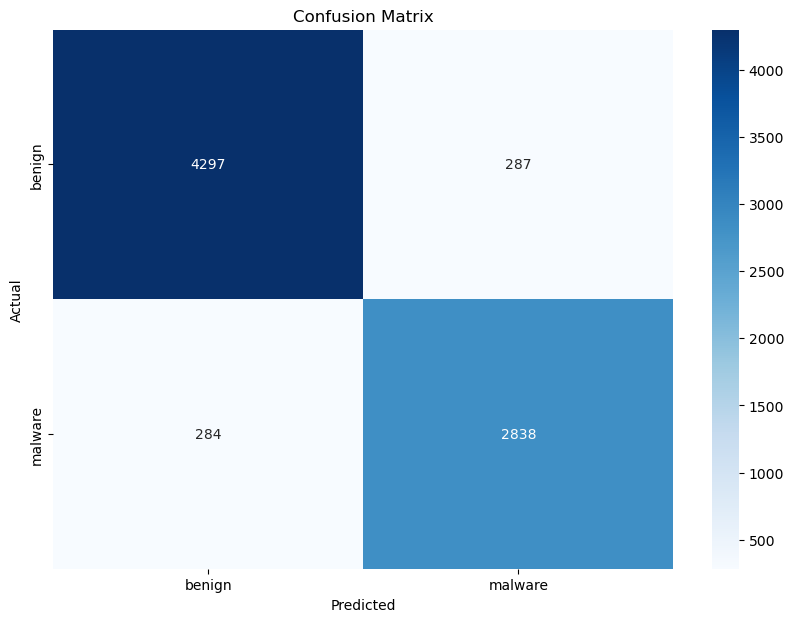

In [16]:
from sklearn.ensemble import AdaBoostClassifier

# יצירת המודל
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# אימון המודל
ada_model.fit(X_train_pca, y_train)

# חיזוי והערכה
y_pred = ada_model.predict(X_test_pca)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred))
# Plotting the confusion matrix
cf = pd.crosstab(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cf, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


C:\Users\rivka\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNN Accuracy: 0.9649623669867635
KNN Classification Report:
               precision    recall  f1-score   support

      benign       0.97      0.98      0.97      4584
     malware       0.96      0.95      0.96      3122

    accuracy                           0.96      7706
   macro avg       0.96      0.96      0.96      7706
weighted avg       0.96      0.96      0.96      7706



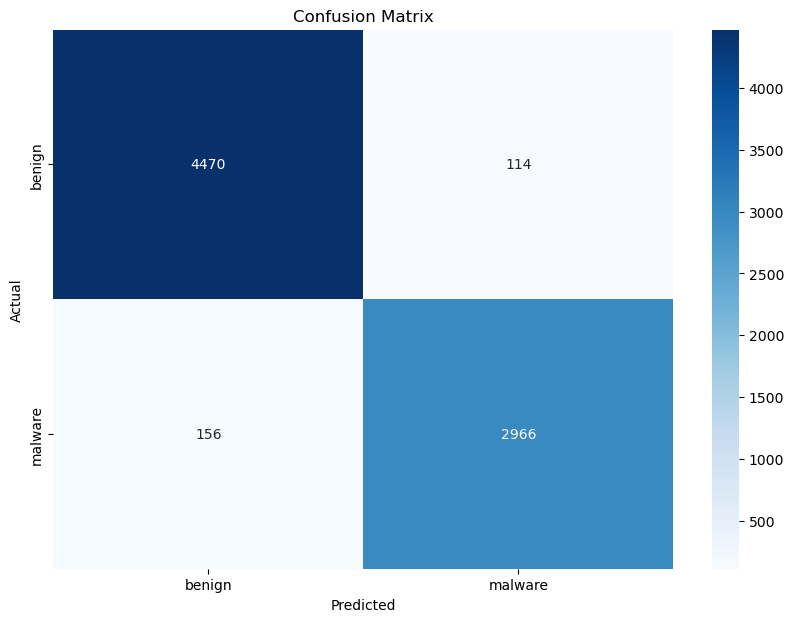

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# יצירת המודל
knn_model = KNeighborsClassifier(n_neighbors=5)

# אימון המודל
knn_model.fit(X_train_pca, y_train)

# חיזוי והערכה
y_pred = knn_model.predict(X_test_pca)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("KNN Classification Report:\n", classification_report(y_test, y_pred))
# Plotting the confusion matrix
cf = pd.crosstab(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cf, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


SVM Accuracy: 0.8488191019984428
SVM Classification Report:
               precision    recall  f1-score   support

      benign       0.92      0.81      0.86      4584
     malware       0.77      0.90      0.83      3122

    accuracy                           0.85      7706
   macro avg       0.85      0.86      0.85      7706
weighted avg       0.86      0.85      0.85      7706



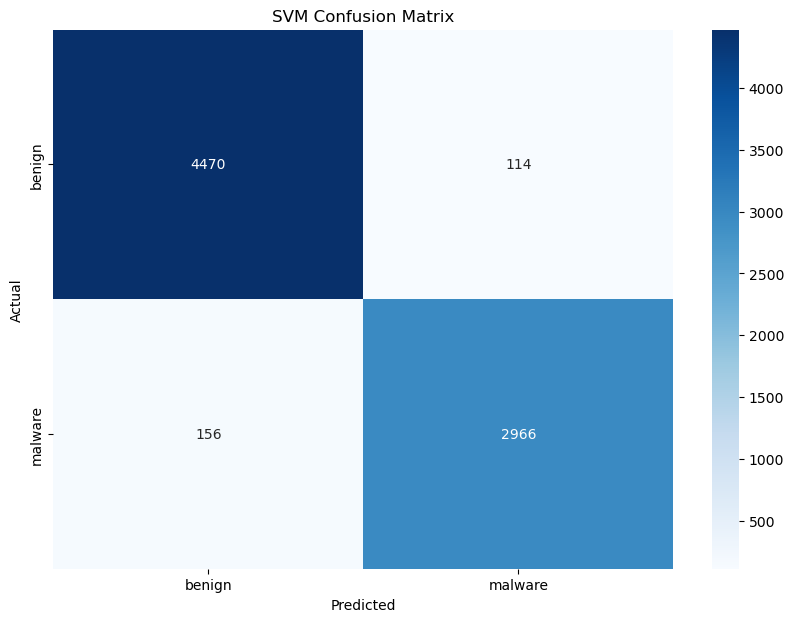

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# יצירת המודל עם פרמטרים שונים
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# אימון המודל
svm_model.fit(X_train_pca, y_train)

# חיזוי והערכה
y_pred_svm = svm_model.predict(X_test_pca)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

# Plotting the confusion matrix
cf = pd.crosstab(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cf, annot=True, fmt='g', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('SVM Confusion Matrix')
plt.show()
